In [ ]:
# Librerias
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_curve

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Para preprocesamiento
from sklearn.model_selection import train_test_split, GridSearchCV,cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Para modelado
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Configuración para visualizaciones
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')

# Ruta al archivo CSV con datos de propiedades colombianas
ruta_base = r"C:\Users\Soportedrai\Documents\habidata\data"

# 2. Especifica el nombre completo del archivo CSV
nombre_archivo = "properties_final.csv"

# 3. Combina la ruta base y el nombre del archivo para la ruta completa
archivo_csv_completo = os.path.join(ruta_base, nombre_archivo)

# Cargar dataset completo
data = pd.read_csv(archivo_csv_completo)
data.head()


,ad_type,start_date,end_date,created_on,lat,lon,price,title,description,property_type,operation_type,surface_total_final,bedrooms_final,bathrooms_final,l3_final,l4_final
0,Propiedad,2020-10-07,2021-05-01,2020-10-07,6.297802,-75.577835,310000000.0,Venta de casa en Florencia,Venta de Casa en Florencia Medellin\n\nLa casa...,Casa,Venta,192.00,5.0,2.0,Medellín,Doce de Octubre
1,Propiedad,2020-10-07,2021-07-23,2020-10-07,6.355670,-75.494249,440000000.0,Venta casa Copacabana Antioquia,Venta casa Copacabana para construir Medellin...,Casa,Venta,260.36,5.0,1.0,Copacabana,Jardines
2,Propiedad,2020-10-07,2020-10-30,2020-10-07,6.307757,-75.560560,172000000.0,Vendo casa en las Brisas 3er piso remodelada p...,Barrio las Brisas Medellín Antioquia\nCasa ter...,Casa,Venta,72.00,3.0,1.0,Medellín,Castilla
3,Propiedad,2020-10-07,2020-11-26,2020-10-07,6.317227,-75.563295,240000000.0,Vendo casa 1er piso garage en cabañas terminada,Barrio cabañas\nCasa en edificio primer piso\n...,Casa,Venta,94.00,3.0,2.0,Bello,Cabañas
4,Propiedad,2020-10-07,2020-11-26,2020-10-07,6.317227,-75.563295,240000000.0,Vendo casa 1er piso garage en cabañas terminada,Barrio cabañas\nCasa en edificio primer piso\n...,Casa,Venta,94.00,3.0,2.0,Bello,Cabañas



Primeras filas del Dataframe

Cantidad de filas y columnas:

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21192 entries, 0 to 21191
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_type              21192 non-null  object 
 1   start_date           21192 non-null  object 
 2   end_date             21192 non-null  object 
 3   created_on           21192 non-null  object 
 4   lat                  16543 non-null  float64
 5   lon                  16543 non-null  float64
 6   price                21192 non-null  float64
 7   title                21192 non-null  object 
 8   description          21192 non-null  object 
 9   property_type        21192 non-null  object 
 10  operation_type       21192 non-null  object 
 11  surface_total_final  21192 non-null  float64
 12  bedrooms_final       21192 non-null  float64
 13  bathrooms_final      21192 non-null  float64
 1

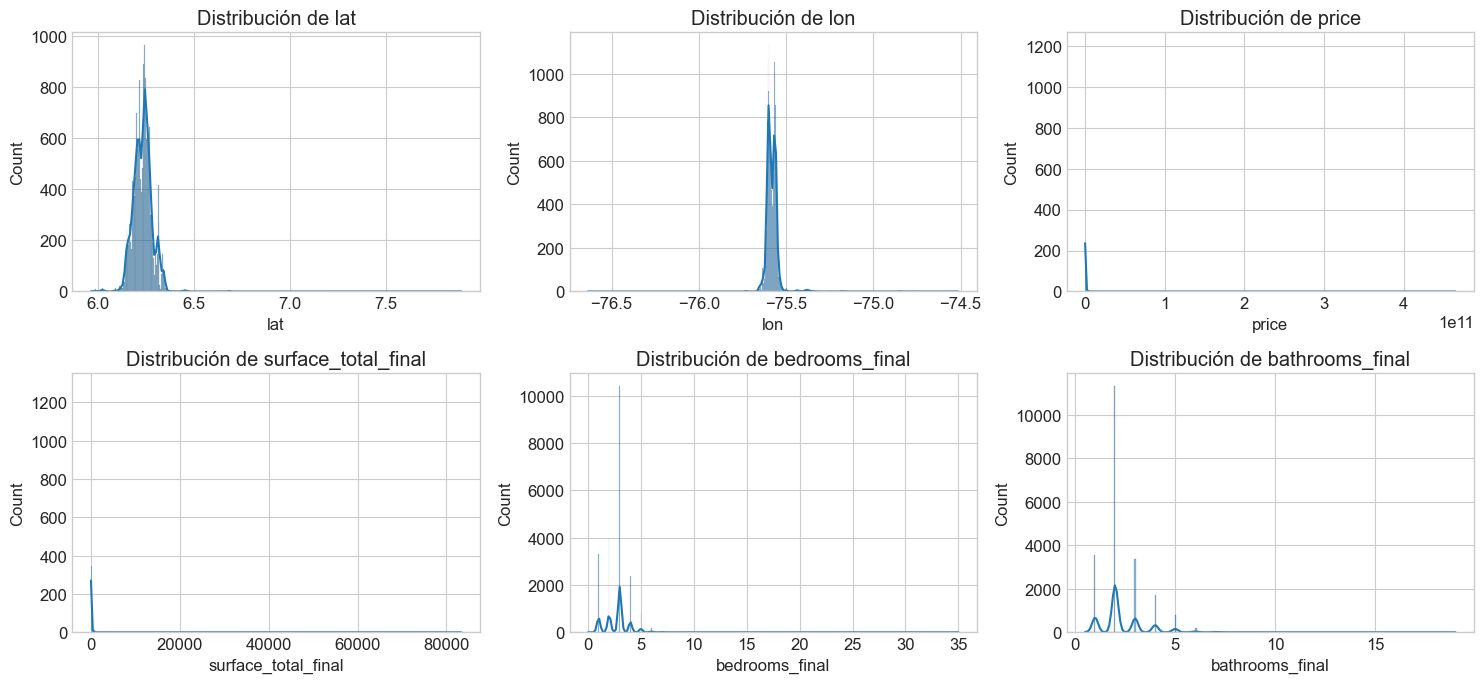


Detección de outliers en variables numéricas:


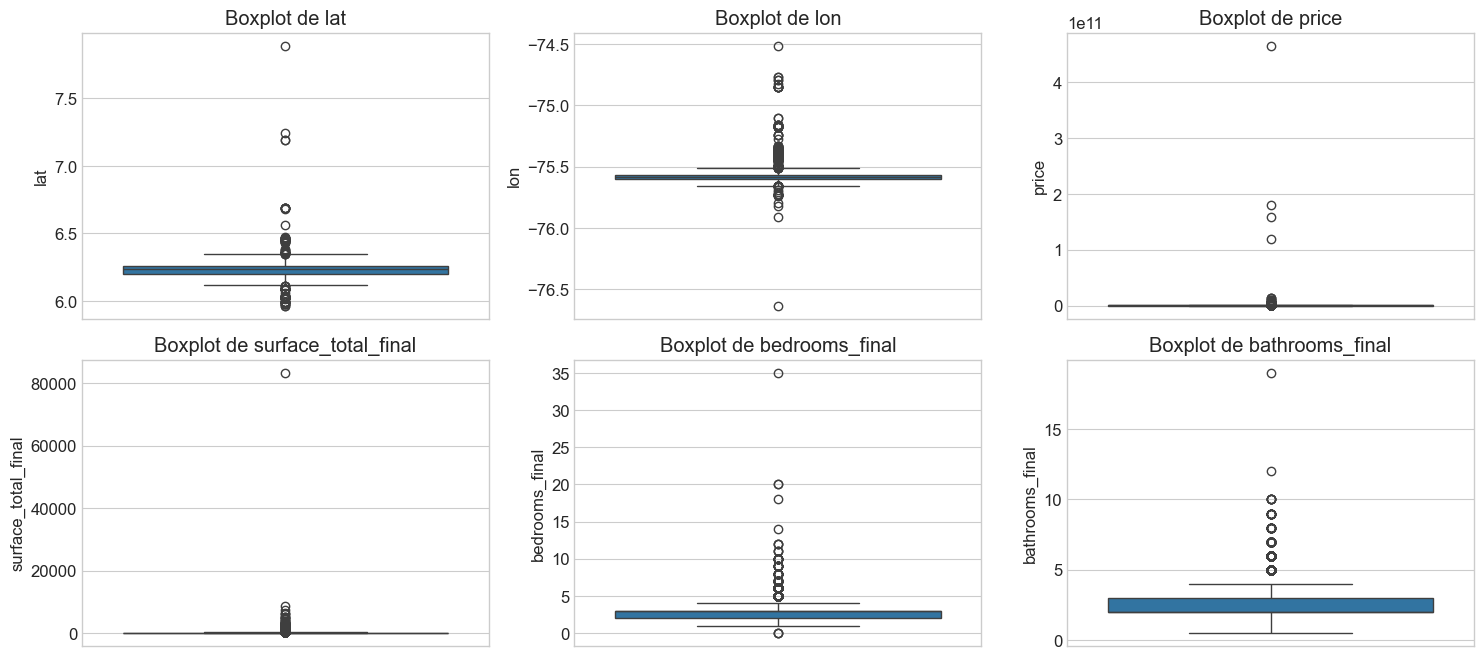


Matriz de correlación entre variables numéricas:


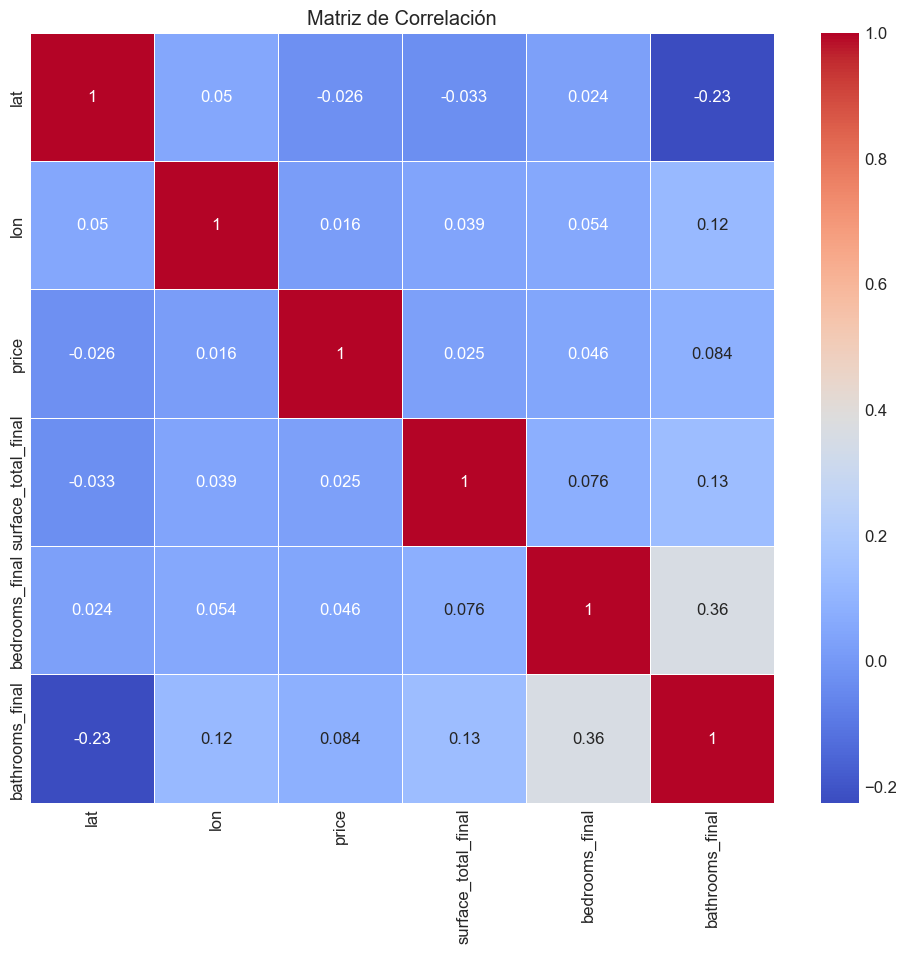

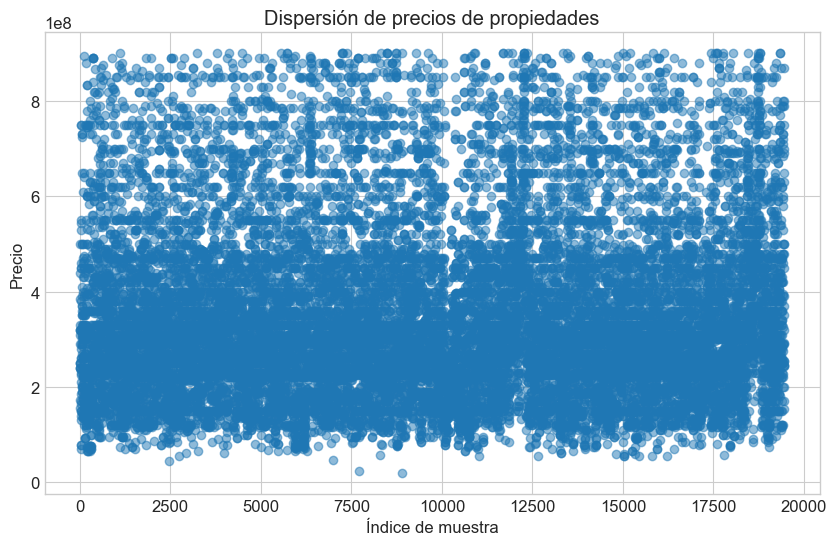

--- Eliminación de surface_total_final ---
Límite aplicado: surface_total_final > 2000
Tamaño original del DataFrame: 19462 filas
Tamaño del DataFrame después de filtrar: 19466 filas
Registros eliminados: -4 filas


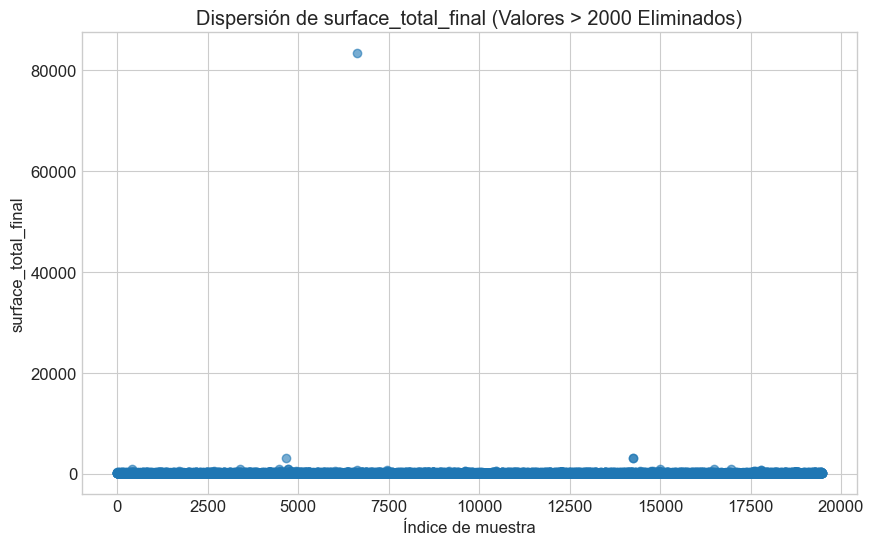

Tamaño del conjunto de entrenamiento: 15569 muestras
Tamaño del conjunto de prueba: 3893 muestras
Forma de X_train después del preprocesamiento: (15569, 96)
                           R2_mean      MAE_mean     RMSE_mean
Random Forest             0.843147  4.334470e+07  7.272265e+07
Decision Tree             0.795640  4.476854e+07  8.301263e+07
Gradient Boosting         0.781758  6.231807e+07  8.581278e+07
Linear Regression         0.701601  7.076831e+07  1.003122e+08
Support Vector Regressor -0.058193  1.400696e+08  1.890282e+08

Generando gráficos de resultados de CV...


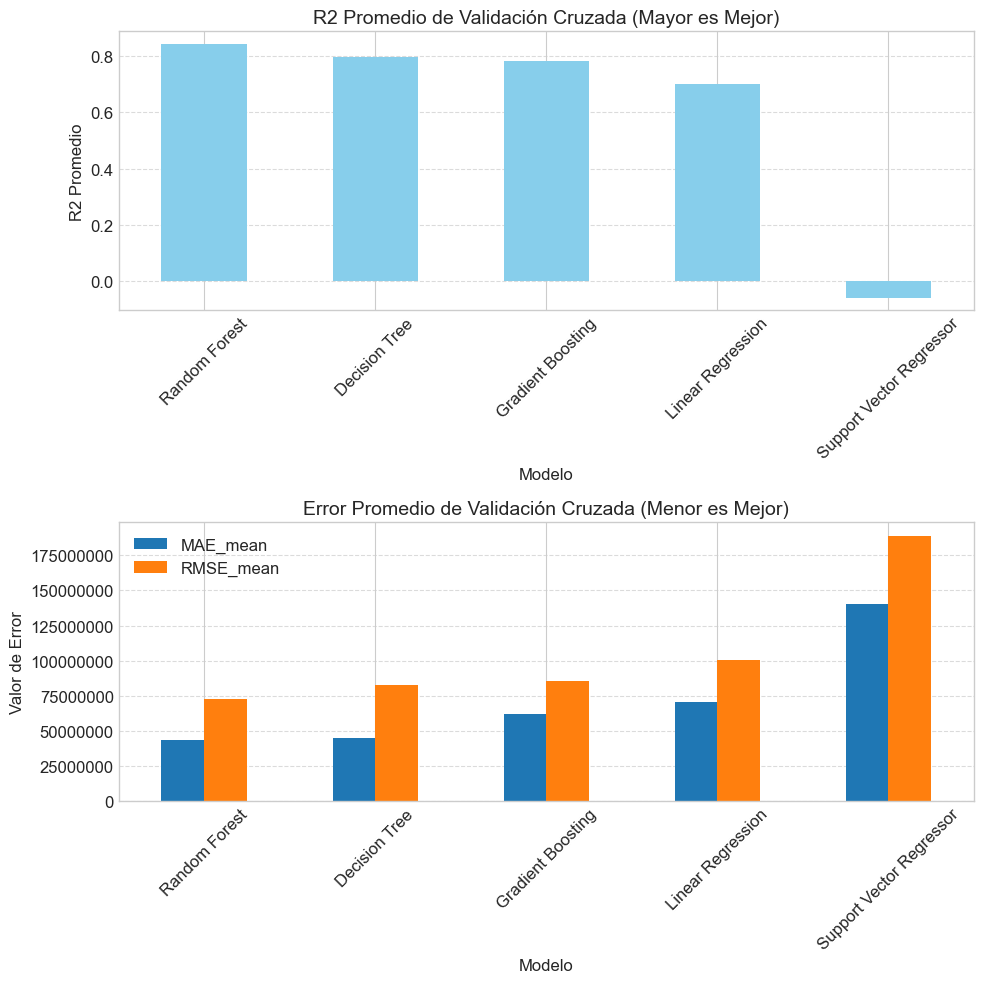

R2: 0.8425847826213175
MAE: 42655539.40007557
RMSE: 5287887764872294.0


In [ ]:
"""#Entendimiento de los datos"""

# Mostrar las primeras filas del Dataframe
print("\nPrimeras filas del Dataframe")
data.head()

# Mostrar cantidad de filas y columnas
print("\nCantidad de filas y columnas:")
data.shape

# Obtener información general del DataFrame
print("\nInformación del DataFrame:")
data.info()

# Descripción estadística de los datos numéricos
print("\nDescripción Estadística:")
data.describe()

# Verificar valores nulos
print("\nValores nulos por columna:")
data.isnull().sum()

# Verificar tipos de datos
print("\nTipos de datos:")
data.dtypes

"""#Visualización Exploratoria"""

# Función para determinar columnas numéricas y categóricas
def identificar_tipos_columnas(dataframe):
    numericas = dataframe.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categoricas = dataframe.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
    return numericas, categoricas

columnas_numericas, columnas_categoricas = identificar_tipos_columnas(data)

# Distribución de variables numéricas
print("\nDistribución de variables numéricas:")
plt.figure(figsize=(15, 10))
for i, column in enumerate(columnas_numericas[:min(len(columnas_numericas), 9)]):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribución de {column}')
plt.tight_layout()
plt.show()

# Boxplots para detectar outliers (valores atípicos)
print("\nDetección de outliers en variables numéricas:")
plt.figure(figsize=(15, 10))
for i, column in enumerate(columnas_numericas[:min(len(columnas_numericas), 9)]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

# Matriz de correlación
print("\nMatriz de correlación entre variables numéricas:")
plt.figure(figsize=(12, 10))
correlation_matrix = data[columnas_numericas].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

"""#Eliminación de outliers de precio"""

Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar datos dentro de 1.5*IQR del rango intercuartílico
data = data[(data['price'] >= Q1 - 1.5 * IQR) & (data['price'] <= Q3 + 1.5 * IQR)]

# Gráfico de dispersión de precios",
plt.figure(figsize=(10, 6))
plt.scatter(range(len(data)), data['price'], alpha=0.5)
plt.title('Dispersión de precios de propiedades')
plt.xlabel('Índice de muestra')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

# Definición del límite
LIMITE_SUPERIOR = 2000


# 1. Aplicar la eliminación de valores superiores
# La condición mantiene los valores <= 1000
data = data[data['surface_total_final'] <= LIMITE_SUPERIOR]

# 2. Resumen de la eliminación
registros_eliminados = data.shape[0] - data.shape[0]

print(f"--- Eliminación de {'surface_total_final'} ---")
print(f"Límite aplicado: {'surface_total_final'} > {LIMITE_SUPERIOR}")
print(f"Tamaño original del DataFrame: {data.shape[0]} filas")
print(f"Tamaño del DataFrame después de filtrar: {data.shape[0]} filas")
print(f"Registros eliminados: {registros_eliminados} filas")

# 3. Gráfico de dispersión para verificar el resultado
plt.figure(figsize=(10, 6))
plt.scatter(range(len(data)), data['surface_total_final'], alpha=0.6)
plt.title(f'Dispersión de {'surface_total_final'} (Valores > {LIMITE_SUPERIOR} Eliminados)')
plt.xlabel('Índice de muestra')
plt.ylabel('surface_total_final')
plt.grid(True)
plt.show()


In [ ]:

##########################################################################################################################################
#######################################        ENTRENAMIENTO             #######################################
##########################################################################################################################################

# Seleccionar características relevantes
features = ['created_on','surface_total_final', 'bedrooms_final', 'bathrooms_final', 'l3_final', 'l4_final']
X = data[features]
y = data['price']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")

# Identificar tipos de columnas
numeric_features = ['surface_total_final', 'bedrooms_final', 'bathrooms_final']
categorical_features = ['l3_final', 'l4_final']

# Crear transformadores para diferentes tipos de columnas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar transformadores usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Verificar la forma de los datos después del preprocesamiento
X_train_preprocessed = preprocessor.fit_transform(X_train)
print(f"Forma de X_train después del preprocesamiento: {X_train_preprocessed.shape}")

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

"""#Validación cruzada, comparación y resultados"""

results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    scores = cross_validate(pipeline, X_train, y_train,
                            cv=5,
                            scoring=('r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error'),
                            return_train_score=True)
    results[name] = {
        'R2_mean': np.mean(scores['test_r2']),
        'MAE_mean': -np.mean(scores['test_neg_mean_absolute_error']),
        'RMSE_mean': -np.mean(scores['test_neg_root_mean_squared_error'])
    }

cv_results = pd.DataFrame(results).T.sort_values(by='R2_mean', ascending=False)
print(cv_results)

print("\nGenerando gráficos de resultados de CV...")
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5) # Aumentar espacio entre subgráficos

# Gráfico 1: R2_mean (Mayor es mejor)
cv_results['R2_mean'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('R2 Promedio de Validación Cruzada (Mayor es Mejor)', fontsize=14)
axes[0].set_ylabel('R2 Promedio')
axes[0].set_xlabel('Modelo')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 2: MAE_mean y RMSE_mean (Menor es mejor)
cv_results[['MAE_mean', 'RMSE_mean']].plot(kind='bar', ax=axes[1])
axes[1].set_title('Error Promedio de Validación Cruzada (Menor es Mejor)', fontsize=14)
axes[1].set_ylabel('Valor de Error')
axes[1].set_xlabel('Modelo')

# Usamos formato simple para las etiquetas del eje Y para evitar notación científica grande
axes[1].ticklabel_format(style='plain', axis='y') 
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


"""#Entrenar modelo final y evaluar en test con el mejor modelo que fue RandomForestRegressor:"""

best_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', RandomForestRegressor(random_state=42))])

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))


In [ ]:
###########################################################################################################
########################### HIPERPARAMETROS
###########################################################################################################

"""#Búsqueda de hiperparámetros con GridSearchCV"""

param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(
    Pipeline(steps=[('preprocessor', preprocessor),
                    ('model', RandomForestRegressor(random_state=42))]),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid.fit(X_train, y_train)
print("Mejores hiperparámetros:", grid.best_params_)
print("Mejor score (R2):", grid.best_score_)

"""#Evaluar el modelo optimizado"""

best_rf = grid.best_estimator_
y_pred_test = best_rf.predict(X_test)

print("R2 (test):", r2_score(y_test, y_pred_test))
print("MAE (test):", mean_absolute_error(y_test, y_pred_test))
print("RMSE (test):", mean_squared_error(y_test, y_pred_test))



Mejores hiperparámetros: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 300}
Mejor score (R2): 0.8434188833882883
R2 (test): 0.8436063284766978
MAE (test): 42487513.483914204
RMSE (test): 5253572023866604.0


In [ ]:
# Importaciones necesarias si ejecutas esto en un nuevo script
import pandas as pd
import numpy as np
# Asume que 'best_rf' y el 'preprocessor' están definidos por el código anterior.

def predecir_precio_vivienda(superficie, dormitorios, banos, localidad_l3, localidad_l4, modelo_optimizado):  
    data_input = pd.DataFrame({
        'surface_total_final': [superficie],
        'bedrooms_final': [dormitorios],
        'bathrooms_final': [banos],
        'l3_final': [localidad_l3],
        'l4_final': [localidad_l4],
        # Usamos una fecha genérica o la fecha actual para 'created_on' si es requerida por X
        # Si 'created_on' no fue usada en el preprocesador, puedes ignorarla.
        # X_train features: ['created_on', 'surface_total_final', 'bedrooms_final', 'bathrooms_final', 'l3_final', 'l4_final']
        # Si 'created_on' no está en numeric_features ni categorical_features, el preprocessor la ignora.
        # La creamos si el modelo espera 6 features:
        'created_on': [pd.to_datetime('2024-01-01')] # Dummy date
    })
    
    # Asegúrate de que las columnas estén en el orden correcto si es necesario:
    data_input = data_input[['created_on', 'surface_total_final', 'bedrooms_final', 'bathrooms_final', 'l3_final', 'l4_final']]
    
    # 2. Realizar la predicción
    prediccion = modelo_optimizado.predict(data_input)
    
    return prediccion[0]

# --- SIMULACIÓN DE DATOS INGRESADOS POR EL USUARIO (Dashboard Input) ---
print("\n--- Simulación de Predicción ---")

# Ejemplo de datos de una vivienda a predecir:
superficie_ej = 192.0
dormitorios_ej = 5
banos_ej = 2
localidad_l3_ej = "Medellin"
localidad_l4_ej = "Doce de Octubre"

try:
    precio_predicho = predecir_precio_vivienda(
        superficie_ej,
        dormitorios_ej,
        banos_ej,
        localidad_l3_ej,
        localidad_l4_ej,
        best_rf # Usamos el modelo optimizado obtenido de GridSearchCV
    )

    print(f"Características de la Vivienda:")
    print(f"  Superficie Total: {superficie_ej} m²")
    print(f"  Dormitorios: {dormitorios_ej}")
    print(f"  Baños: {banos_ej}")
    print(f"  Ciudad (L3): {localidad_l3_ej}")
    print(f"  Barrio (L4): {localidad_l4_ej}")
    print(f"\nEl Precio Predicho de la Vivienda es: ${precio_predicho:,.2f}")

except NameError:
    print("\n⚠️ ERROR: Asegúrate de que las variables 'best_rf' y 'preprocessor' estén definidas y accesibles en este entorno después de ejecutar GridSearchCV.")
except Exception as e:
    print(f"\n⚠️ Ocurrió un error durante la predicción: {e}")


--- Simulación de Predicción ---
Características de la Vivienda:
  Superficie Total: 192.0 m²
  Dormitorios: 5
  Baños: 2
  Barrio (L3): Medellin
  Sub-Barrio (L4): Doce de Octubre

El Precio Predicho de la Vivienda es: $312,496,162.46
